# KNN analysis with forge dataset

This example shows how to build a K nearest neighbors model with the synthetic forge dataset.

The data consists of two features and a label.  Here are example values for features => the resulting label.

* 8.92229526, -0.63993225 => 0
* 9.32298256,  5.09840649 => 1
* 8.68937095,  1.48709629 => 0

It's an example of a binary classification problem because the label is either zero or one.

## How KNN works

KNN looks for the nearest data point to predict the label.  If one set of x, y coordinates has a label of 0, then the algorithm assumes a point nearby x, y will also have a label of 0.  A data point has the same label as its nearest neighbor.  It's easy to understand the KNN algo intuitively.

KNN can also be run with more neighbors than one.  You can also look at the three nearest neighbors and select the most popular label.  If one neighbor has a label of 1 and the other two have labels of 0, then the predicted label is 0.

## Visualizing the data

Create a plot with some data observations and draw a line to the nearest neighbor.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/powers/opt/miniconda3/envs/ml-examples/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'forge_one_neighbor')

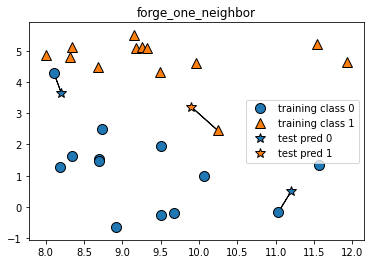

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("forge_one_neighbor")

Use the same data points and draw lines to the three nearest neighbors.  This shows how the algorithm works when the number of neighbors is set to three.

/Users/powers/opt/miniconda3/envs/ml-examples/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


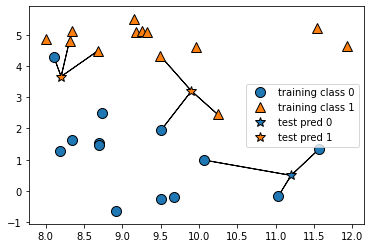

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## Create train and test datasets

Take the labeled data and split it into training and test datasets.

The training data is used to build the KNN model.

The test data is used to evaluate the accuracy of the KNN model.

By convention, `X` represents features and `y` represents labels.  `X_train` contains the features and `y_train` contains the corresponding labels.

In [1]:
from sklearn.model_selection import train_test_split

In [3]:
import mglearn

In [4]:
X, y = mglearn.datasets.make_forge()

/Users/powers/opt/miniconda3/envs/ml-examples/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Visualize the training features and labels that'll be used to build the KNN model.

In [19]:
X_train

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

In [20]:
y_train

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

## Build the model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Assess accuracy of the model

In [26]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [28]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [27]:
clf.score(X_test, y_test)

0.8571428571428571

Plain English interpretation of results:

* `clf.predict(X_test)`: the predicted labels of the test data using the KNN model
* `y_test`: the actual labels of the test data
* `clf.score(X_test, y_test)`: how often the KNN model predicts the correct result.  KNN predicts the correct results for 6 out of 7 results, which is 85.7% of the time (six divided by seven).